In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.1'}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('')

configrc.store_credentials:WARNING:2020-11-16 03:50:46,358: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

/Users/proyardie/anaconda3/envs/SuperSaiyan/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
from qiskit import *
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, QuantumRegister
from qiskit.qasm import pi
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from qiskit import execute, Aer, BasicAer
import numpy as np
import matplotlib.pyplot as plt
from resizeimage import resizeimage
from PIL import Image
import frqi

In [7]:
import qiskit.ml.datasets as datasets
digits = datasets.digits(training_size=100000, test_size=20000, n = 4)

In [8]:
digits[1]

{'A': array([[-0.09738894, -0.37137344, -0.82812807,  0.15156403],
        [-0.04174546, -0.57090983, -0.68100463,  0.01058287],
        [ 0.08219848, -0.31884042, -0.45365183, -0.02774971],
        [-0.04655975, -0.28755871, -0.70515332,  0.06333056],
        [-0.02478308, -0.4303542 , -0.64652423,  0.08482066],
        [-0.08666252, -0.39014663, -0.665072  , -0.05136583],
        [ 0.01524159, -0.51000681, -0.56909655,  0.07261149],
        [ 0.02445719, -0.32876864, -0.80604279, -0.05825298],
        [-0.00801293, -0.44953316, -0.67048404,  0.07940534],
        [-0.01492895, -0.65496812, -0.86127524,  0.06052397],
        [ 0.21180846, -0.22293689, -0.58600266, -0.1024367 ],
        [ 0.06346323, -0.37774642, -0.77769905,  0.08453884],
        [-0.16766309, -0.53652636, -0.70886051,  0.08402025],
        [ 0.10854364, -0.61000204, -0.29322958, -0.12656962],
        [-0.22970319, -0.39261702, -0.75866546, -0.03409588],
        [ 0.16829081, -0.33639403, -0.61609096,  0.14238187],
   

In [9]:
anc = QuantumRegister(1, "anc")
img = QuantumRegister(11, "img")
anc2 = QuantumRegister(1, "anc2")
c = ClassicalRegister(12)

In [10]:
circuit = QuantumCircuit(anc, img, anc2, c)

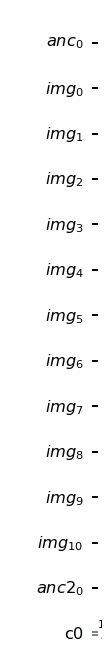

In [11]:
circuit.draw(output = 'mpl')

In [12]:
def image_normalization(image):
    image = resizeimage.resize_cover(image, [32, 32])
    w, h = 32, 32
    image = np.array([[image.getpixel((x,y))[0] for x in range(w)] for y in range(h)])

    # 2-dimentional data convert to 1-dimentional array
    image = image.flatten()
    # change type
    image = image.astype('float64')
    # Normalization(0~pi/2)
    image /= 255.0
    generated_image = np.arcsin(image)

    return generated_image

In [13]:
#load images
flowers = ['flower.jpeg','flower_.jpg', 'flower.png']
image1 = Image.open(flowers[1]).convert('LA')

image1 = image_normalization(image=image1)

In [14]:
for i in range(1, len(img)):
    circuit.h(img[i])

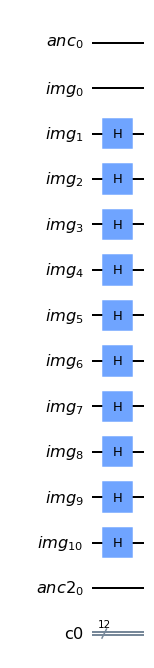

In [15]:
circuit.draw(output='mpl')

In [16]:
#encode images
for i in range(len(image1)):
        if image1[i] != 0:
                frqi.c10ry(circuit, 2 * image1[i], format(i, '010b'), img[0], anc2[0], [img[j] for j in range(1,len(img))])


In [ ]:
import quantum_edge_detection as qed
qed.quantum_edge_detection(circuit)
circuit.measure(anc, c[0])
circuit.measure(img, c[1:12])
print(circuit.depth())
numOfShots = 8192

IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

job = execute(circuit, qcomp, shots=numOfShots)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()

#circuit_drawer(qc).show()
#plot_histogram(result.get_counts(qc))

print(result.get_counts(qc))

# generated image
genimg = np.array([])

#### decode
for i in range(len(image1)):
        try:
                genimg = np.append(genimg,[np.sqrt(result.get_counts(qc)[format(i, '010b')+'10']/numOfShots)])
        except KeyError:
                genimg = np.append(genimg,[0.0])

# inverse nomalization
genimg *= 32.0 * 255.0

# convert type
genimg = genimg.astype('int')

# back to 2-dimentional data
genimg = genimg.reshape((32,32))

plt.imshow(genimg, cmap='gray', vmin=0, vmax=255)
plt.savefig('gen_'+str(imageNum1)+'.png')
plt.show()

79043


/Users/proyardie/anaconda3/envs/SuperSaiyan/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-16 03:57:49,242: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job is being validated

In [93]:
type(circuit.num_qubits)

#from qiskit.tools.visualization import plot_histogram

int

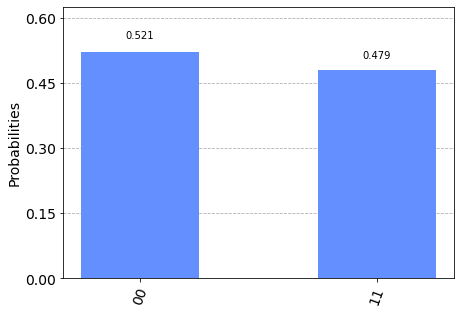

In [20]:
plot_histogram(result)

In [ ]:
plot_histogram(result)